# Data Loading, Storage and File Formats
## Problem Statement: Analyzing Sales Data from Multiple File Formats

### Generate Sample Data:

In [1]:
import pandas as pd
import random


# Generating sample data in a DataFrame
sample_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Product': [f'Product {random.randint(1, 5)}' for _ in range(100)],
    'Sales': [random.randint(100, 1000) for _ in range(100)]
})


### Load and Analyze Sample Data:

In [2]:
sample_data.to_csv("sample_sales_data.csv", index=False)
sample_data.to_excel("sample_sales_data.xlsx", index=False)
sample_data.to_json("sample_sales_data.json", orient="records")

In [3]:
csv_data = pd.read_csv("sample_sales_data.csv")
excel_data = pd.read_excel("sample_sales_data.xlsx")
json_data = pd.read_json("sample_sales_data.json")

In [4]:
print('CSV Data')
print(csv_data.head())
print('\n')
print('Excel Data')
print(excel_data.head())
print('\n')
print('JSON Data')
print(json_data.head())

CSV Data
         Date    Product  Sales
0  2023-01-01  Product 2    819
1  2023-01-02  Product 3    639
2  2023-01-03  Product 1    673
3  2023-01-04  Product 5    556
4  2023-01-05  Product 1    920


Excel Data
        Date    Product  Sales
0 2023-01-01  Product 2    819
1 2023-01-02  Product 3    639
2 2023-01-03  Product 1    673
3 2023-01-04  Product 5    556
4 2023-01-05  Product 1    920


JSON Data
        Date    Product  Sales
0 2023-01-01  Product 2    819
1 2023-01-02  Product 3    639
2 2023-01-03  Product 1    673
3 2023-01-04  Product 5    556
4 2023-01-05  Product 1    920


In [5]:
csv_data.isnull().sum()

Date       0
Product    0
Sales      0
dtype: int64

In [6]:
excel_data.isnull().sum()

Date       0
Product    0
Sales      0
dtype: int64

In [7]:
json_data.isnull().sum()

Date       0
Product    0
Sales      0
dtype: int64

### Data Cleaning:

In [8]:
def correction_function(value):
    # Convert text to uppercase for consistency
    return value.upper()

In [9]:
# Handling missing values
csv_data.dropna(inplace=True)
# Removing duplicates
csv_data.drop_duplicates(inplace=True)
# Correcting inconsistencies
csv_data['Product'] = csv_data['Product'].apply(lambda x: correction_function(x))

In [10]:
csv_data.head()

,Date,Product,Sales
0,2023-01-01,PRODUCT 2,819
1,2023-01-02,PRODUCT 3,639
2,2023-01-03,PRODUCT 1,673
3,2023-01-04,PRODUCT 5,556
4,2023-01-05,PRODUCT 1,920


### Convert Data into a Unified Format:

In [11]:
combined_df = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

In [12]:
combined_df.head()

,Date,Product,Sales
0,2023-01-01,PRODUCT 2,819
1,2023-01-02,PRODUCT 3,639
2,2023-01-03,PRODUCT 1,673
3,2023-01-04,PRODUCT 5,556
4,2023-01-05,PRODUCT 1,920


In [13]:
combined_df.shape

(300, 3)

In [14]:
combined_df.describe()

,Sales
count,300.000000
mean,508.610000
std,276.691438
min,109.000000
25%,257.500000
50%,448.000000
75%,764.250000
max,990.000000


In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     300 non-null    object
 1   Product  300 non-null    object
 2   Sales    300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


### Data Analysis:

In [16]:
total_sales = combined_df['Sales'].sum()
print("Total sales: ",total_sales)
print('\n')
avg_order_value = combined_df['Sales'].mean()
print("Average order value: ",avg_order_value)
print('\n')
category_distribution = combined_df['Product'].value_counts()
print("Number of products sold: ", category_distribution)

Total sales:  152583


Average order value:  508.61


Number of products sold:  Product
Product 2    48
Product 5    44
Product 4    44
Product 1    40
PRODUCT 2    24
Product 3    24
PRODUCT 5    22
PRODUCT 4    22
PRODUCT 1    20
PRODUCT 3    12
Name: count, dtype: int64


### Data Visualization:



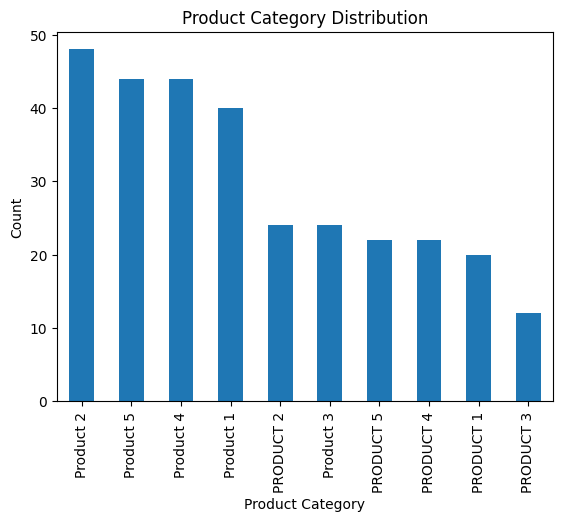

In [17]:
import matplotlib.pyplot as plt

# Create a bar plot for product category distribution
category_distribution.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.show()